In [ ]:
#Importing Required Packages
import pandas as pd
import numpy as np

In [ ]:
#importing the dataset from github
url = 'https://raw.githubusercontent.com/mufeezmomin30/pqrs/master/PAFInal.xlsx'
df1 = pd.read_excel(url)    #Merging the date and time column for further analysis
df1.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Expected Income              int64
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                       float64
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
#Checking the summary of data to see if there is any outlier
df1.describe()

,Expected Income,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,6211.846000,55.672130,5.510000,15.379369,322.966749,0.642151,307.58738,4.761905e+00,15.379369,6.97270
std,2468.088066,26.494628,2.923431,11.708825,245.885335,0.133005,234.17651,6.131498e-14,11.708825,1.71858
min,2246.000000,10.080000,1.000000,0.508500,10.678500,0.416667,10.17000,4.761905e+00,0.508500,4.00000
25%,4165.000000,32.875000,3.000000,5.924875,124.422375,0.529861,118.49750,4.761905e+00,5.924875,5.50000
50%,5968.500000,55.230000,5.000000,12.088000,253.848000,0.638194,241.76000,4.761905e+00,12.088000,7.00000
75%,8015.750000,77.935000,8.000000,22.445250,471.350250,0.760417,448.90500,4.761905e+00,22.445250,8.50000
max,11439.000000,99.960000,10.000000,49.650000,1042.650000,0.874306,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
#There seems to be no outlier
#Dropping gross margin percentage column since there is only one value and City since one branch is serving only one city
#We will also drop Invocie Id since it is of no use for further analysis
df2 = df1.drop(['gross margin percentage','City','Invoice ID'], axis = 1)

In [ ]:
#Installing Category Encoders module for converting text columns into numerical form for further analysis 
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [ ]:
#Now we will encode categorical columns into some numbers. We will use CatBoostEncoder module for the same

cbedata = df2.copy()

labels = pd.Series(df2['Total'])

# Defining the categorical columns: 
catcols = ['Customer type', 'Gender','Payment']

# Importing CatBoostEncoder
from category_encoders import CatBoostEncoder

ce = CatBoostEncoder()

# Fitting it on the data:
ce.fit(cbedata[catcols], labels)

# Transforming the data:
cbedata[catcols] = ce.transform(cbedata[catcols])
df = cbedata

In [ ]:
#Impoting only columns that are required for Clustering
dfap = df[['Gender','Expected Income','Customer type','Total']]

## Cluster Analysis

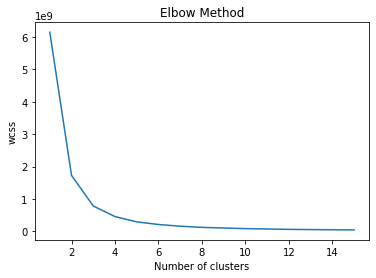

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.cluster import KMeans
X = xa1 = dfap[['Gender','Expected Income','Total']].values #Importing columns for Cluster Analysis

#Find the number of clusters
wcss = []

for i in range (1,16): #15 cluster
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plot.plot(range(1,16),wcss)
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('wcss')
plot.show()

#KMeans clustering
kmeans= KMeans(n_clusters=3,init='k-means++', random_state=0)
y=kmeans.fit_predict(X)

dfap['cluster'] = y
dfap.to_csv('adsad.csv')

In [ ]:
df1['cluster'] = dfap['cluster']

In [ ]:
result = df1.groupby(['cluster']).agg({'Gender': ['count'],'Expected Income': ['mean', 'min', 'max'],'Total': ['mean', 'min', 'max']})

In [ ]:
result

Gender Expected Income                    Total                    
         count            mean   min    max        mean       min       max
cluster                                                                    
0          359     6557.877437  5173   8078  276.733905   12.6945  1034.460
1          395     3756.544304  2246   5153  175.859237   10.6785   416.178
2          246     9649.321138  8068  11439  626.645848  399.7560  1042.650

In [ ]:
df1.groupby(['cluster','Gender'])['Gender'].count()

cluster  Gender
0        Female    181
         Male      178
1        Female    199
         Male      196
2        Female    121
         Male      125
Name: Gender, dtype: int64

In [ ]:
df1.groupby(['cluster','Product line'])['Total'].mean()

cluster  Product line          
0        Electronic accessories    268.568809
         Fashion accessories       256.039831
         Food and beverages        303.919520
         Health and beauty         244.572336
         Home and lifestyle        306.463138
         Sports and travel         273.086100
1        Electronic accessories    163.990331
         Fashion accessories       176.151589
         Food and beverages        194.575657
         Health and beauty         186.756306
         Home and lifestyle        163.047098
         Sports and travel         172.029000
2        Electronic accessories    634.612125
         Fashion accessories       632.089238
         Food and beverages        624.794864
         Health and beauty         623.092575
         Home and lifestyle        637.589707
         Sports and travel         609.693000
Name: Total, dtype: float64

In [ ]:
!jupyter nbconvert --to HTML ClusterAn.ipynb

[NbConvertApp] Converting notebook ClusterAn.ipynb to HTML
[NbConvertApp] Writing 311260 bytes to ClusterAn.html


In [ ]:
df1.to_csv('PA Final Data.csv')